# Healthcare Access and Child Malnutrition: A Global Perspective
**Author:** UNICEF Data Analyst  
**Date:** April 25, 2025

Healthcare access and child malnutrition remain pressing global issues. This notebook explores trends in health infrastructure and child nutrition, using UNICEF data. We focus on disparities across countries and assess how indicators like GDP per capita relate to outcomes such as life expectancy.

In [1]:
import pandas as pd
from plotnine import *
import geopandas as gpd
import matplotlib.pyplot as plt

## Load Data

In [2]:
metadata = pd.read_csv("unicef_metadata.csv")
indicator_1 = pd.read_csv("unicef_indicator_1.csv")
indicator_2 = pd.read_csv("unicef_indicator_2.csv")

## Visualization 1: World Map - Health Facilities with Basic Services

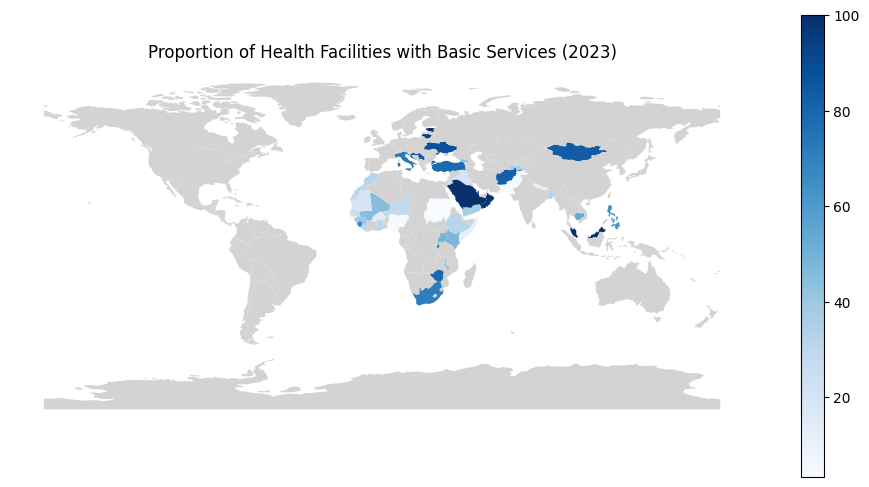

In [8]:
# Load world map from uploaded shapefile
world = gpd.read_file("ne_110m_admin_0_countries.shp")  # Use the uploaded .shp file
world = world.rename(columns={'NAME': 'country'})  # Adjust column name if needed

map_data = world.merge(latest_data, on='country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
map_data.plot(column='obs_value', ax=ax, legend=True, cmap='Blues', missing_kwds={'color': 'lightgrey'})
ax.set_title(f"Proportion of Health Facilities with Basic Services ({latest_year})")
plt.axis('off')
plt.show()


## Visualization 2: Bar Chart - Severe Wasting by Sex (2018)

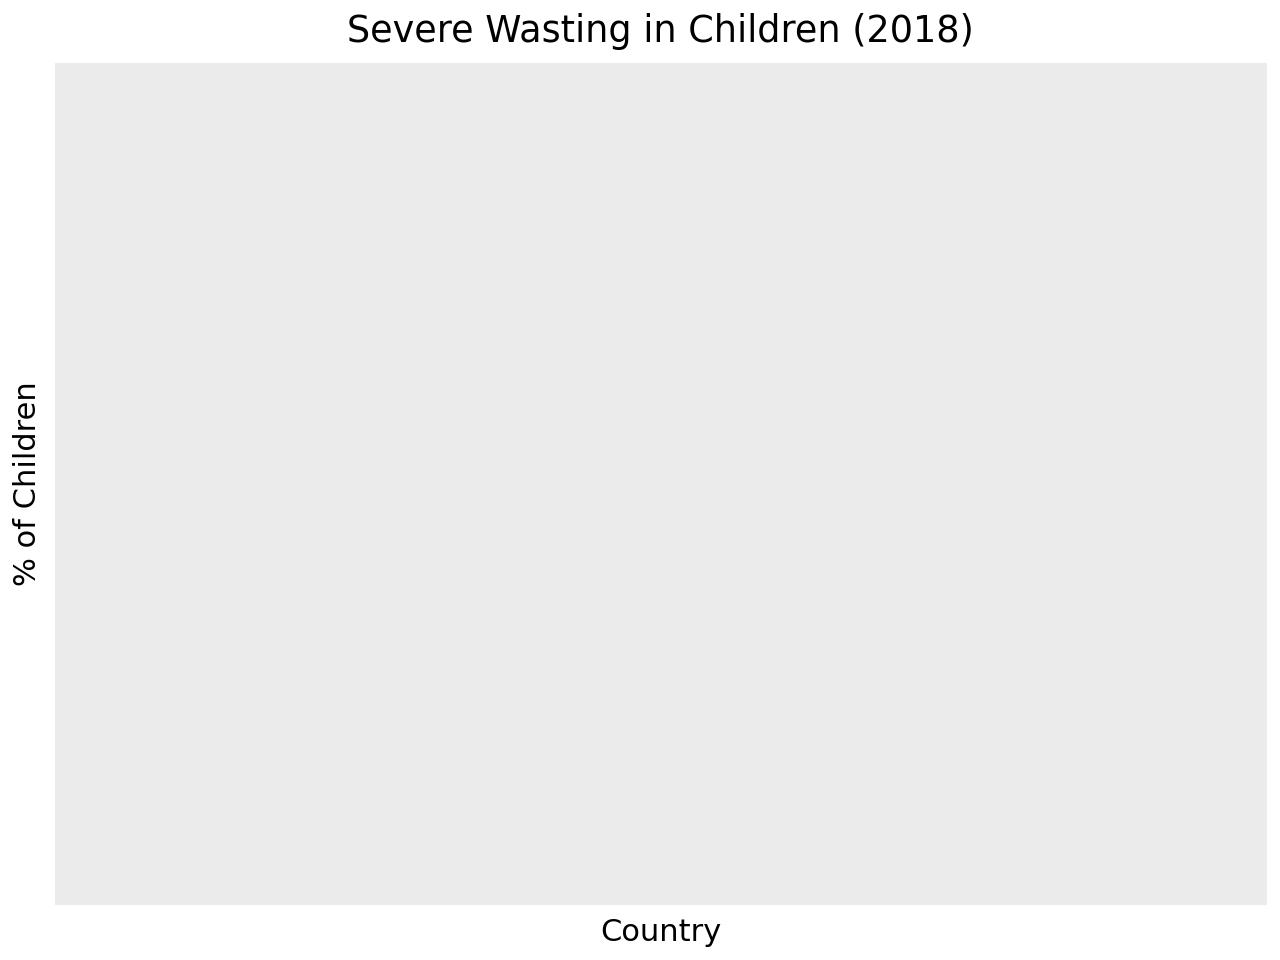

In [10]:
wasting_2018 = indicator_2[indicator_2['time_period'] == 2018]
bar_plot = (
    ggplot(wasting_2018, aes(x='country', y='obs_value', fill='sex')) +
    geom_bar(stat='identity', position='dodge') +
    theme(axis_text_x=element_text(rotation=90, size=6)) +
    labs(title='Severe Wasting in Children (2018)', y='% of Children', x='Country')
)
bar_plot

## Visualization 3: Scatterplot - GDP per Capita vs Life Expectancy

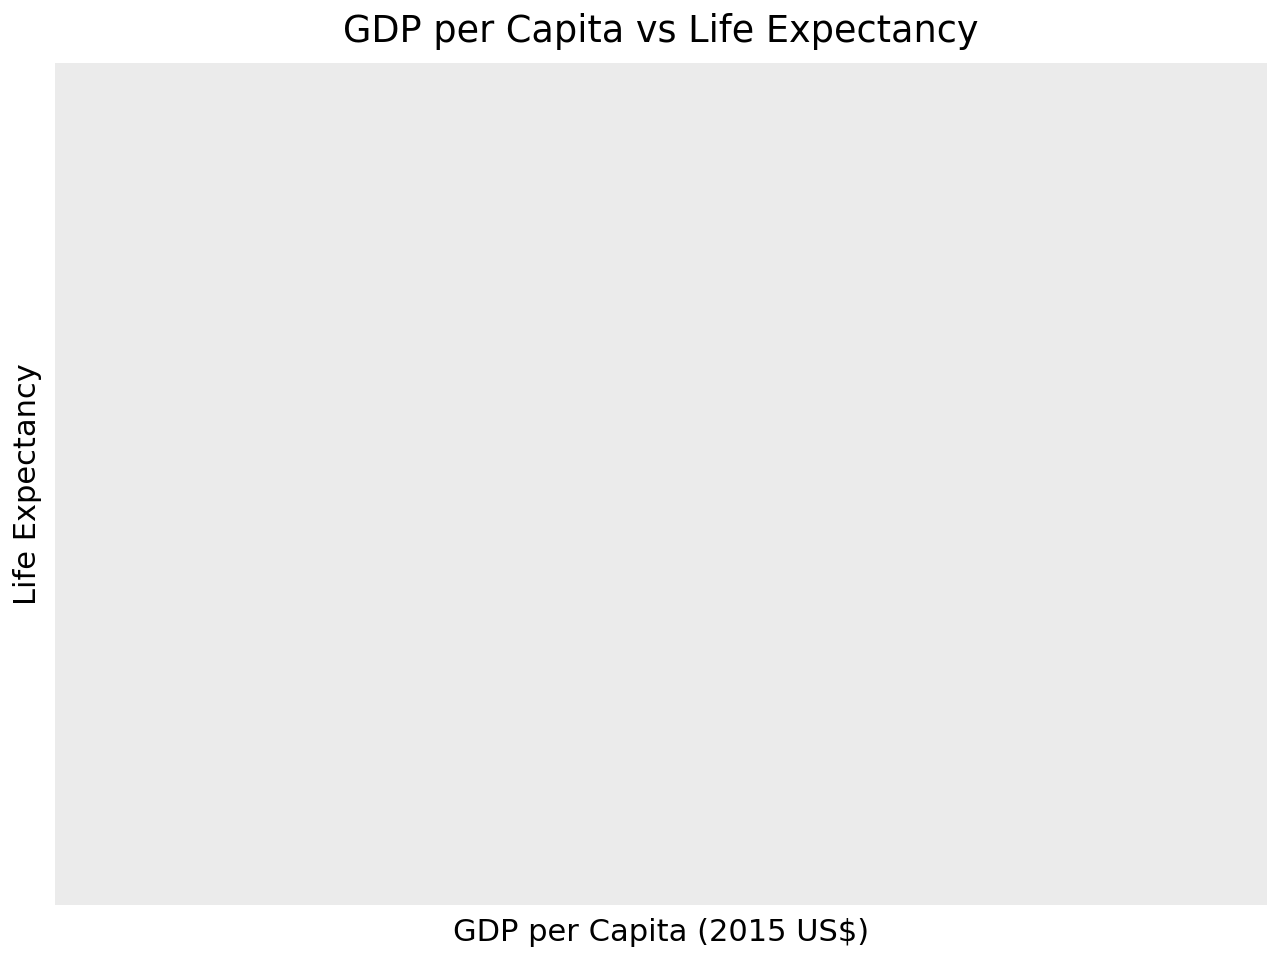

In [5]:
latest_metadata = metadata[metadata['year'] == metadata['year'].max()]
scatter_data = latest_metadata[['country', 'GDP per capita (constant 2015 US$)', 'Life expectancy at birth, total (years)']].dropna()

scatter_plot = (
    ggplot(scatter_data, aes(x='GDP per capita (constant 2015 US$)', y='Life expectancy at birth, total (years)')) +
    geom_point(alpha=0.6) +
    geom_smooth(method='lm') +
    labs(title='GDP per Capita vs Life Expectancy', x='GDP per Capita (2015 US$)', y='Life Expectancy')
)
scatter_plot

## Visualization 4: Time Series - Global Life Expectancy Trend

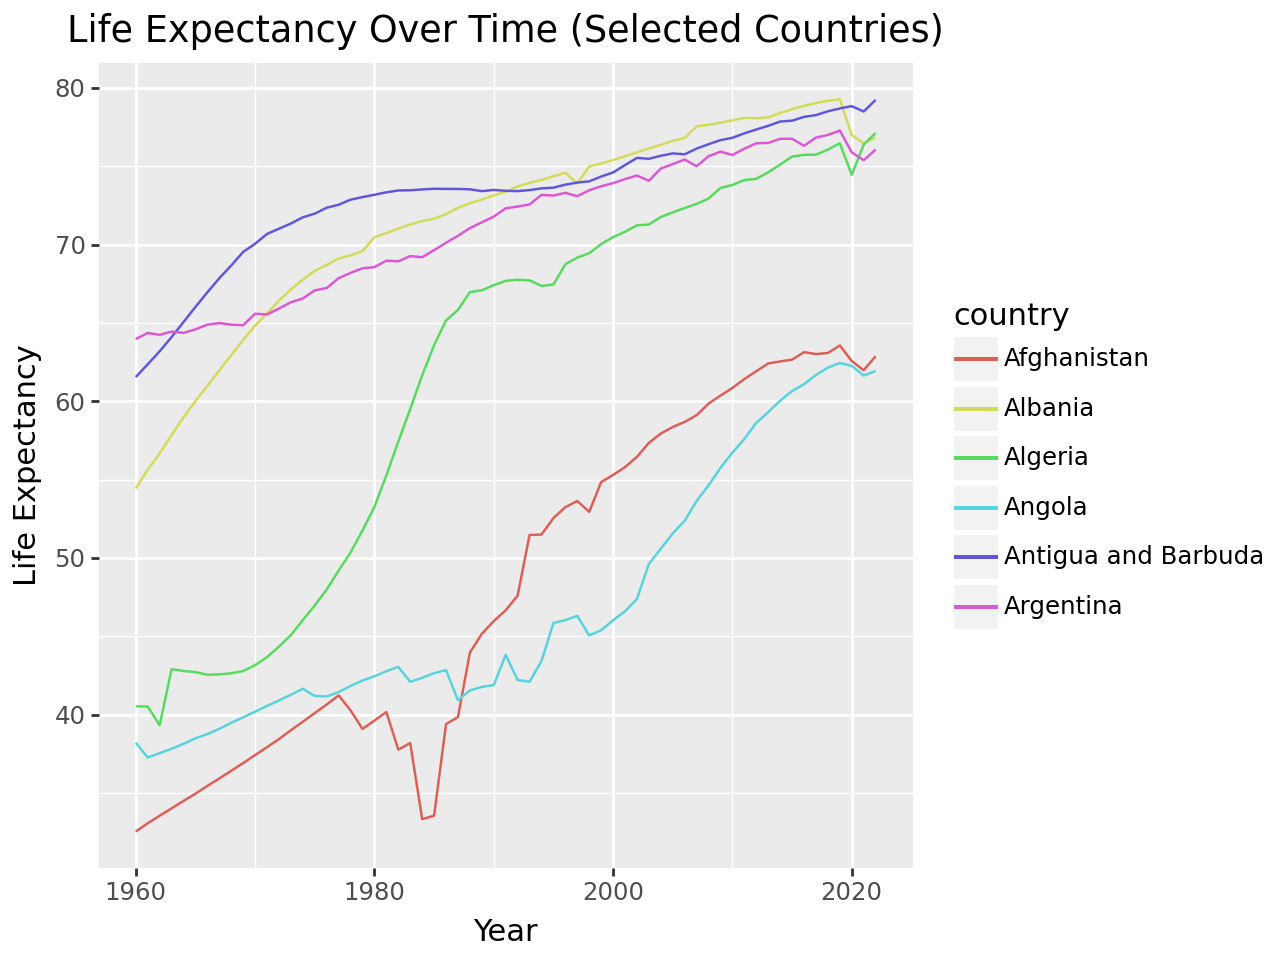

In [6]:
time_series = metadata[['country', 'year', 'Life expectancy at birth, total (years)']].dropna()

selected_countries = time_series['country'].value_counts().head(6).index.tolist()
time_series = time_series[time_series['country'].isin(selected_countries)]

line_plot = (
    ggplot(time_series, aes(x='year', y='Life expectancy at birth, total (years)', color='country')) +
    geom_line() +
    labs(title='Life Expectancy Over Time (Selected Countries)', x='Year', y='Life Expectancy')
)
line_plot

## Conclusion
These visualizations show that access to basic healthcare and child nutrition outcomes vary significantly across countries. Socioeconomic indicators like GDP per capita are strongly associated with life expectancy, emphasizing the need for equitable development and investment in health systems globally.